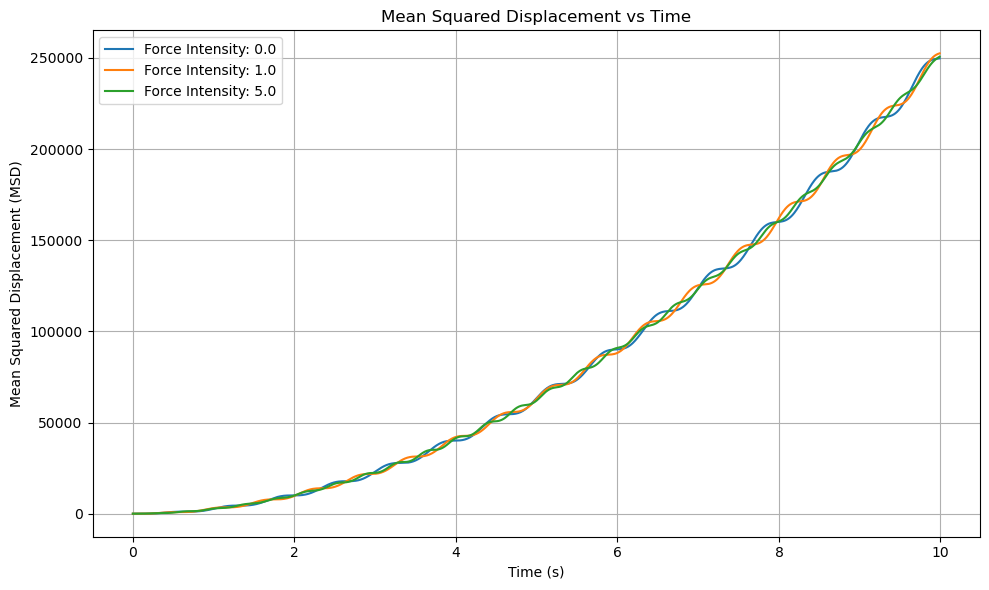

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Filenames
filenames = ["msd_f_0.000000.txt", "msd_f_1.000000.txt", "msd_f_5.000000.txt"]
labels = ['Force Intensity: 0.0', 'Force Intensity: 1.0', 'Force Intensity: 5.0']

# Create a plot
plt.figure(figsize=(10, 6))

# Read and plot data for each file
for filename, label in zip(filenames, labels):
    try:
        # Load the data, skipping the header
        time, msd = np.loadtxt(filename, skiprows=1, unpack=True)
        
        # Plot the mean squared displacement
        plt.plot(time, msd, label=label)
        
    except Exception as e:
        print(f"Error reading {filename}: {e}")

# Customize the plot
plt.title('Mean Squared Displacement vs Time')
plt.xlabel('Time (s)')
plt.ylabel('Mean Squared Displacement (MSD)')
plt.legend()
plt.grid(True)
#plt.yscale('log')  # Use logarithmic scale if necessary
plt.tight_layout()

# Show the plot
plt.show()


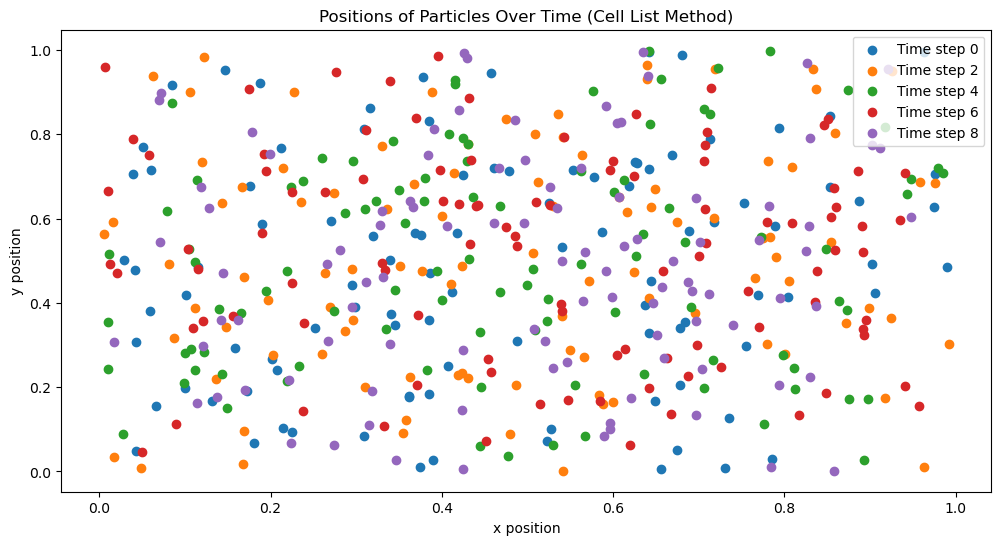

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 100  # Total number of particles
k_spring = 1.0  # Spring constant
Lambda = 0.5  # Rest length of the spring
f = 1.0  # Magnitude of the propulsive force
dt = 0.01  # Time step
gamma = 1.0  # Damping coefficient
sigma = 1.0  # Standard deviation for Brownian motion
num_steps = 1000  # Number of simulation steps
cell_size = 0.1  # Size of each cell in the cell list

# Initialize positions and velocities
positions = np.random.rand(N, 2)  # Random initial positions
velocities = np.zeros((N, 2))  # Initial velocities are zero

# Store data for plotting
position_history = []

def create_cell_list(positions, cell_size):
    """Create a cell list for the given particle positions."""
    # Calculate the number of cells in each dimension
    num_cells = int(np.ceil(1.0 / cell_size))
    cell_list = { (i, j): [] for i in range(num_cells) for j in range(num_cells) }
    
    for idx, pos in enumerate(positions):
        cell_x = int(pos[0] // cell_size)
        cell_y = int(pos[1] // cell_size)
        cell_list[(cell_x, cell_y)].append(idx)
    
    return cell_list

def get_neighbors(cell_list, pos, cell_size):
    """Retrieve neighbors in neighboring cells."""
    cell_x = int(pos[0] // cell_size)
    cell_y = int(pos[1] // cell_size)
    neighbors = []
    
    # Check current and neighboring cells
    for dx in [-1, 0, 1]:
        for dy in [-1, 0, 1]:
            neighbors += cell_list.get((cell_x + dx, cell_y + dy), [])
    
    return neighbors

# Simulation loop
for step in range(num_steps):
    forces = np.zeros((N, 2))  # Reset forces

    # Create the cell list for the current positions
    cell_list = create_cell_list(positions, cell_size)

    # Compute forces between dumbbells using the cell list
    for i in range(0, N, 2):
        # Particle indices
        p1 = i
        p2 = i + 1

        # Find neighbors for the first particle
        neighbors = get_neighbors(cell_list, positions[p1], cell_size)

        for neighbor in neighbors:
            if neighbor != p1 and neighbor != p2:  # Exclude the same particles
                r = positions[neighbor] - positions[p1]
                r_mag = np.linalg.norm(r)
                
                # Spring force (only if within interaction distance)
                if r_mag < 2 * Lambda:
                    spring_force = k_spring * (r_mag - Lambda) * (r / r_mag)
                    forces[p1] += spring_force

        # Calculate forces between the two particles in the dumbbell
        r = positions[p2] - positions[p1]
        r_mag = np.linalg.norm(r)

        # Spring force between particles in the dumbbell
        spring_force = k_spring * (r_mag - Lambda) * (r / r_mag)
        forces[p1] += spring_force
        forces[p2] -= spring_force

        # Propulsive force
        propulsive_force = f * (r / r_mag)
        forces[p1] += propulsive_force
        forces[p2] -= propulsive_force

    # Brownian motion force
    brownian_forces = sigma * np.random.randn(N, 2)

    # Update velocities and positions
    velocities += (forces + brownian_forces - gamma * velocities) * dt / gamma
    positions += velocities * dt

    # Optional: apply periodic boundary conditions
    positions = np.mod(positions, 1.0)

    # Store position data
    if step % 100 == 0:  # Store every 100 steps
        position_history.append(positions.copy())

# Convert position history to numpy array for easier plotting
position_history = np.array(position_history)

# Plotting
plt.figure(figsize=(12, 6))

# Plot the positions of particles at different time steps
for i in range(0, len(position_history), len(position_history) // 5):  # Plot 5 snapshots
    plt.scatter(position_history[i, :, 0], position_history[i, :, 1], label=f'Time step {i}')

plt.title('Positions of Particles Over Time (Cell List Method)')
plt.xlabel('x position')
plt.ylabel('y position')
plt.legend()
plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import time  # Importing the time module for timing

# Parameters
N = 100  # Total number of particles
k_spring = 1.0  # Spring constant
Lambda = 0.5  # Rest length of the spring
f = 1.0  # Magnitude of the propulsive force
dt = 0.01  # Time step
gamma = 1.0  # Damping coefficient
sigma = 1.0  # Standard deviation for Brownian motion
num_steps = 1000  # Number of simulation steps
cell_size = 0.1  # Size of each cell in the cell list

# Initialize positions and velocities
positions = np.random.rand(N, 2)  # Random initial positions
velocities = np.zeros((N, 2))  # Initial velocities are zero

# Function to run simulation using pairwise interaction
def pairwise_interaction():
    positions = np.random.rand(N, 2)
    velocities = np.zeros((N, 2))
    position_history = []

    start_time = time.time()  # Start timing

    for step in range(num_steps):
        forces = np.zeros((N, 2))  # Reset forces

        # Compute forces between dumbbells (pairwise)
        for i in range(0, N, 2):
            p1 = i
            p2 = i + 1
            r = positions[p2] - positions[p1]
            r_mag = np.linalg.norm(r)

            # Spring force between particles in the dumbbell
            spring_force = k_spring * (r_mag - Lambda) * (r / r_mag)
            forces[p1] += spring_force
            forces[p2] -= spring_force

            # Propulsive force
            propulsive_force = f * (r / r_mag)
            forces[p1] += propulsive_force
            forces[p2] -= propulsive_force

            # Brownian motion force
            brownian_force = sigma * np.random.randn(2)
            forces[p1] += brownian_force
            forces[p2] += brownian_force

        # Update velocities and positions
        velocities += (forces - gamma * velocities) * dt / gamma
        positions += velocities * dt

        # Apply periodic boundary conditions
        positions = np.mod(positions, 1.0)

        if step % 100 == 0:
            position_history.append(positions.copy())

    end_time = time.time()  # End timing
    return positions, position_history, end_time - start_time

# Function to run simulation using cell list
def cell_list_approach():
    positions = np.random.rand(N, 2)
    velocities = np.zeros((N, 2))
    position_history = []

    start_time = time.time()  # Start timing

    for step in range(num_steps):
        forces = np.zeros((N, 2))  # Reset forces

        # Create the cell list for the current positions
        cell_list = create_cell_list(positions, cell_size)

        # Compute forces using the cell list
        for i in range(0, N, 2):
            p1 = i
            p2 = i + 1

            # Find neighbors for the first particle
            neighbors = get_neighbors(cell_list, positions[p1], cell_size)

            for neighbor in neighbors:
                if neighbor != p1 and neighbor != p2:
                    r = positions[neighbor] - positions[p1]
                    r_mag = np.linalg.norm(r)

                    if r_mag < 2 * Lambda:
                        spring_force = k_spring * (r_mag - Lambda) * (r / r_mag)
                        forces[p1] += spring_force

            # Spring force between the two particles in the dumbbell
            r = positions[p2] - positions[p1]
            r_mag = np.linalg.norm(r)
            spring_force = k_spring * (r_mag - Lambda) * (r / r_mag)
            forces[p1] += spring_force
            forces[p2] -= spring_force

            # Propulsive force
            propulsive_force = f * (r / r_mag)
            forces[p1] += propulsive_force
            forces[p2] -= propulsive_force

        # Brownian motion force
        brownian_forces = sigma * np.random.randn(N, 2)

        # Update velocities and positions
        velocities += (forces + brownian_forces - gamma * velocities) * dt / gamma
        positions += velocities * dt

        # Apply periodic boundary conditions
        positions = np.mod(positions, 1.0)

        if step % 100 == 0:
            position_history.append(positions.copy())

    end_time = time.time()  # End timing
    return positions, position_history, end_time - start_time

# Execute both methods
final_positions_pairwise, history_pairwise, time_pairwise = pairwise_interaction()
final_positions_cell_list, history_cell_list, time_cell_list = cell_list_approach()

# Print execution times
print(f"Execution Time (Pairwise Interaction): {time_pairwise:.4f} seconds")
print(f"Execution Time (Cell List Approach): {time_cell_list:.4f} seconds")

# Plotting the final configuration for the cell list approach
plt.figure(figsize=(12, 12))

# Create cell list for the last configuration
cell_list = create_cell_list(final_positions_cell_list, cell_size)

# Draw cells and particles
num_cells = int(np.ceil(1.0 / cell_size))
for (cell_x, cell_y), indices in cell_list.items():
    rect = patches.Rectangle((cell_x * cell_size, cell_y * cell_size), cell_size, cell_size,
                             linewidth=1, edgecolor='blue', facecolor='none', alpha=0.5)
    plt.gca().add_patch(rect)

    # Plot particles in the cell
    for idx in indices:
        plt.scatter(final_positions_cell_list[idx, 0], final_positions_cell_list[idx, 1], color='red', s=50)

plt.title('Final Configuration of Particles (Cell List Approach)')
plt.xlabel('x position')
plt.ylabel('y position')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


NameError: name 'create_cell_list' is not defined

Execution Time (Pairwise Interaction): 1.3175 seconds
Execution Time (Cell List Approach): 6.2011 seconds


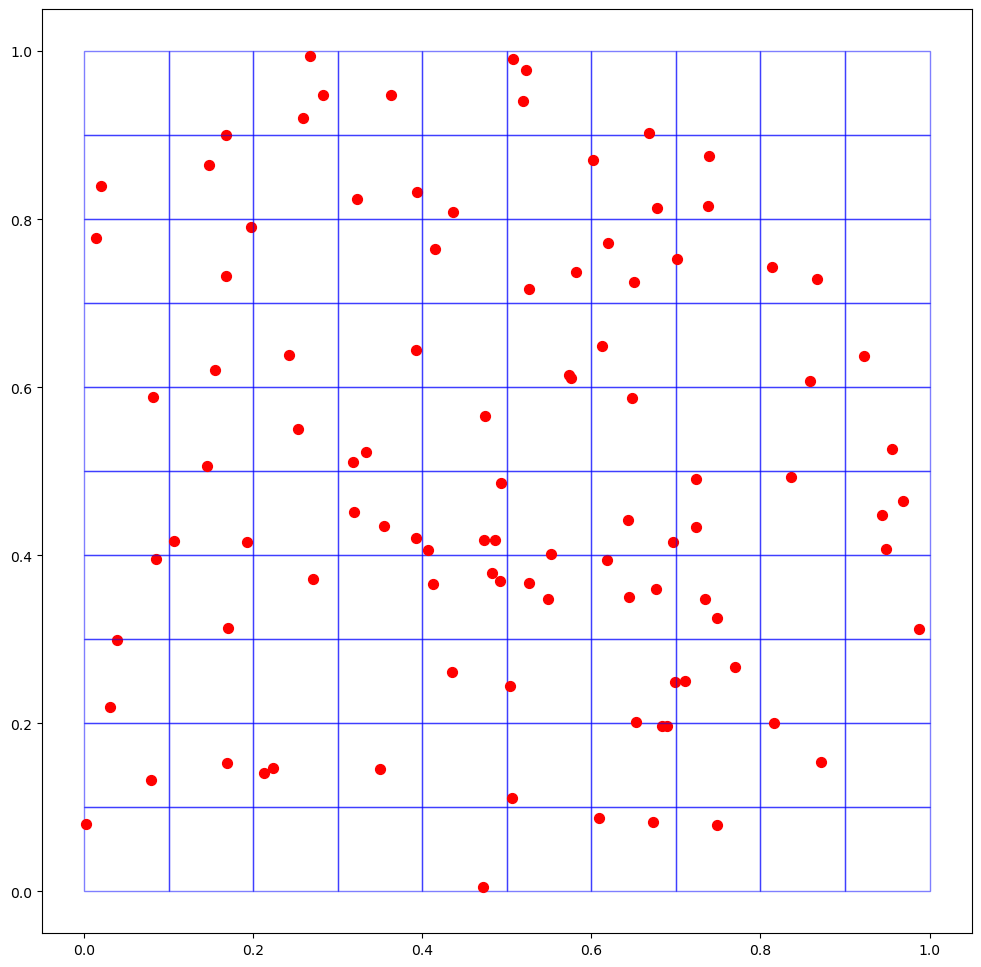

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import time  # Importing the time module for timing

# Parameters
N = 100  # Total number of particles
k_spring = 1.0  # Spring constant
Lambda = 0.5  # Rest length of the spring
f = 1.0  # Magnitude of the propulsive force
dt = 0.01  # Time step
gamma = 1.0  # Damping coefficient
sigma = 1.0  # Standard deviation for Brownian motion
num_steps = 1000  # Number of simulation steps
cell_size = 0.1  # Size of each cell in the cell list

# Function to create a cell list
def create_cell_list(positions, cell_size):
    num_cells = int(np.ceil(1.0 / cell_size))
    cell_list = {}
    for i in range(num_cells):
        for j in range(num_cells):
            cell_list[(i, j)] = []
    
    for index, pos in enumerate(positions):
        cell_x = int(pos[0] // cell_size)
        cell_y = int(pos[1] // cell_size)
        cell_list[(cell_x, cell_y)].append(index)
    
    return cell_list

# Function to get neighbors from the cell list
def get_neighbors(cell_list, position, cell_size):
    cell_x = int(position[0] // cell_size)
    cell_y = int(position[1] // cell_size)
    neighbors = []
    
    # Check surrounding cells
    for dx in [-1, 0, 1]:
        for dy in [-1, 0, 1]:
            neighbor_cell = (cell_x + dx, cell_y + dy)
            if neighbor_cell in cell_list:
                neighbors.extend(cell_list[neighbor_cell])
    
    return neighbors

# Function to run simulation using pairwise interaction
def pairwise_interaction():
    positions = np.random.rand(N, 2)
    velocities = np.zeros((N, 2))
    position_history = []

    start_time = time.time()  # Start timing

    for step in range(num_steps):
        forces = np.zeros((N, 2))  # Reset forces

        # Compute forces between dumbbells (pairwise)
        for i in range(0, N, 2):
            p1 = i
            p2 = i + 1
            r = positions[p2] - positions[p1]
            r_mag = np.linalg.norm(r)

            # Spring force between particles in the dumbbell
            spring_force = k_spring * (r_mag - Lambda) * (r / r_mag)
            forces[p1] += spring_force
            forces[p2] -= spring_force

            # Propulsive force
            propulsive_force = f * (r / r_mag)
            forces[p1] += propulsive_force
            forces[p2] -= propulsive_force

            # Brownian motion force
            brownian_force = sigma * np.random.randn(2)
            forces[p1] += brownian_force
            forces[p2] += brownian_force

        # Update velocities and positions
        velocities += (forces - gamma * velocities) * dt / gamma
        positions += velocities * dt

        # Apply periodic boundary conditions
        positions = np.mod(positions, 1.0)

        if step % 100 == 0:
            position_history.append(positions.copy())

    end_time = time.time()  # End timing
    return positions, position_history, end_time - start_time

# Function to run simulation using cell list
def cell_list_approach():
    positions = np.random.rand(N, 2)
    velocities = np.zeros((N, 2))
    position_history = []

    start_time = time.time()  # Start timing

    for step in range(num_steps):
        forces = np.zeros((N, 2))  # Reset forces

        # Create the cell list for the current positions
        cell_list = create_cell_list(positions, cell_size)

        # Compute forces using the cell list
        for i in range(0, N, 2):
            p1 = i
            p2 = i + 1

            # Find neighbors for the first particle
            neighbors = get_neighbors(cell_list, positions[p1], cell_size)

            for neighbor in neighbors:
                if neighbor != p1 and neighbor != p2:
                    r = positions[neighbor] - positions[p1]
                    r_mag = np.linalg.norm(r)

                    if r_mag < 2 * Lambda:
                        spring_force = k_spring * (r_mag - Lambda) * (r / r_mag)
                        forces[p1] += spring_force

            # Spring force between the two particles in the dumbbell
            r = positions[p2] - positions[p1]
            r_mag = np.linalg.norm(r)
            spring_force = k_spring * (r_mag - Lambda) * (r / r_mag)
            forces[p1] += spring_force
            forces[p2] -= spring_force

            # Propulsive force
            propulsive_force = f * (r / r_mag)
            forces[p1] += propulsive_force
            forces[p2] -= propulsive_force

        # Brownian motion force
        brownian_forces = sigma * np.random.randn(N, 2)

        # Update velocities and positions
        velocities += (forces + brownian_forces - gamma * velocities) * dt / gamma
        positions += velocities * dt

        # Apply periodic boundary conditions
        positions = np.mod(positions, 1.0)

        if step % 100 == 0:
            position_history.append(positions.copy())

    end_time = time.time()  # End timing
    return positions, position_history, end_time - start_time

# Execute both methods
final_positions_pairwise, history_pairwise, time_pairwise = pairwise_interaction()
final_positions_cell_list, history_cell_list, time_cell_list = cell_list_approach()

# Print execution times
print(f"Execution Time (Pairwise Interaction): {time_pairwise:.4f} seconds")
print(f"Execution Time (Cell List Approach): {time_cell_list:.4f} seconds")

# Plotting the final configuration for the cell list approach
plt.figure(figsize=(12, 12))

# Create cell list for the last configuration
cell_list = create_cell_list(final_positions_cell_list, cell_size)

# Draw cells and particles
num_cells = int(np.ceil(1.0 / cell_size))
for (cell_x, cell_y), indices in cell_list.items():
    rect = patches.Rectangle((cell_x * cell_size, cell_y * cell_size), cell_size, cell_size,
                             linewidth=1, edgecolor='blue', facecolor='none', alpha=0.5)
    plt.gca().add_patch(rect)

    # Plot particles in the cell
    for idx in indices:
        plt.scatter(final_positions_cell_list[idx, 0], final_positions_cell_list[idx, 1], color='red', s=50)




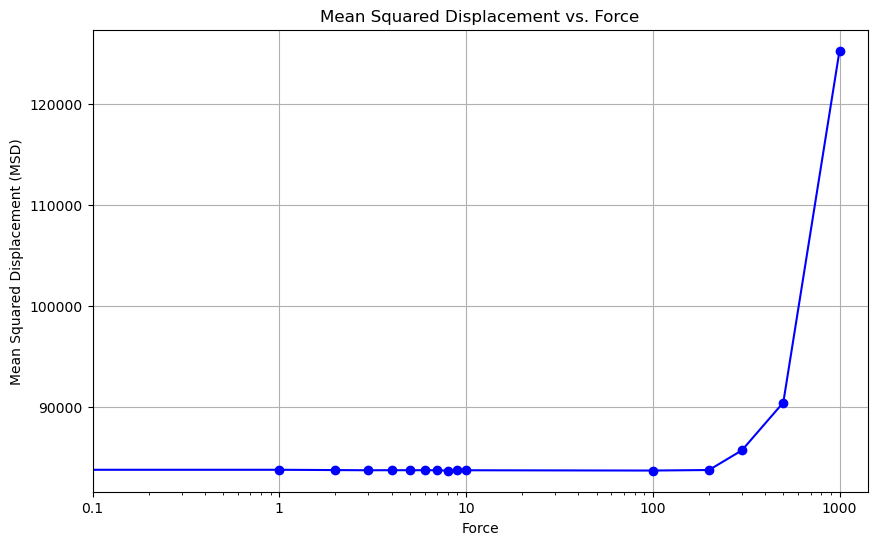

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Dati forniti
data = {
    "Force": [
        0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 
        6.0, 7.0, 8.0, 9.0, 10.0, 100.0, 
        200.0, 300.0, 500.0, 1000.0
    ],
    "MSD": [
        83794.072594, 83761.194576, 83732.304629, 
        83712.727973, 83721.153084, 83716.025557, 
        83719.830872, 83718.354750, 83667.787370, 
        83702.607225, 83713.805489, 83685.636131, 
        83737.835494, 85682.759945, 90421.145227, 
        125254.887964
    ]
}

# Creazione del DataFrame
df = pd.DataFrame(data)

# Creazione del grafico
plt.figure(figsize=(10, 6))
plt.plot(df["Force"], df["MSD"], marker='o', linestyle='-', color='b')
plt.title("Mean Squared Displacement vs. Force")
plt.xlabel("Force")
plt.ylabel("Mean Squared Displacement (MSD)")
plt.xscale('log')  # Scale logaritmica per la forza
plt.grid(True)
plt.xticks([0.1, 1, 10, 100, 1000], labels=[0.1, 1, 10, 100, 1000])
plt.show()

